我们将使用Kaggle的数据集，利用线性回归模型，依据大学各项排名的指标来预测其综合得分。可以使用 sk-learn 等第三方库，不要求自己实现线性回归.

基础任务（80分）：
- 1.观察和可视化数据，揭示数据的特性。
- 2.训练集和测试集应按照7:3的比例随机划分，采用RMSE（均方根误差）作为模型的评估标准，计算并获取测试集上的线性回归模型的RMSE值。
- 3.对线性回归模型中的系数进行分析。
- 4.尝试使用其他类型的回归模型，并比较其效果。

进阶任务（20分）：
- 1.尝试将地区的离散特征融入到线性回归模型中，然后比较并分析结果。
- 2.利用R2指标和VIF指标进行模型评价和特征筛选, 尝试是否可以增加模型精度。
- 

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 10)  # 设置显示最大行
np.set_printoptions(threshold=10)

data_df = pd.read_csv('D:\AI\基于回归分析的大学综合得分预测\cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame

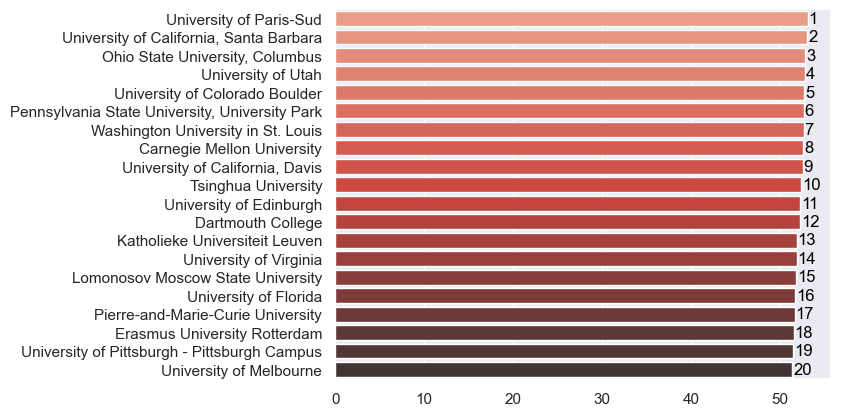

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# 专用于jupyter的魔法指令
%matplotlib inline
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']# 设置字体为宋体
data_df1=data_df
data_df1=data_df1.drop("region",axis=1)
mean_df = data_df1.groupby('institution').mean() # 按学校聚合并对聚合的列取平均，就是计算这个学校这几年来每一项数据的均值
mean_df.to_excel('output.xlsx', index=True)
top_df = mean_df.sort_values(by='score', ascending=False).iloc[50:70]  # 取某一部分学校的切片
sns.set()
x = top_df['score'].values  # 综合得分列表
y = top_df.index.values  # 学校名称列表
sns.barplot(x=x, y=y, palette="Reds_d")  # 画条形图
# 画水平条形图
ax = sns.barplot(x=x, y=y, palette="Reds_d")

# 在每个条形的右侧添加序号
for i, v in enumerate(x):
    ax.text(v + 0.1, i, str(i+1), color='black', va='center')

plt.show()




### 训练集和测试集应按照7:3的比例随机划分，采用RMSE（均方根误差）作为模型的评估标准，计算并获取测试集上的线性回归模型的RMSE值。

In [14]:
# 数据简单处理
import pandas as pd

df = pd.read_csv('D:\AI\基于回归分析的大学综合得分预测\cwurData.csv')

# 使用del语句删除多列

del df['world_rank']
del df['national_rank']
del df['institution']
del df['region']
del df['year']




In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 读取数据


# 选择特征和目标变量
df.dropna(inplace=True)
X = df.drop(['score'], axis=1)

y = df['score']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 打印结果
print(f"测试集上的RMSE值: {rmse}")





测试集上的RMSE值: 3.499410215479146


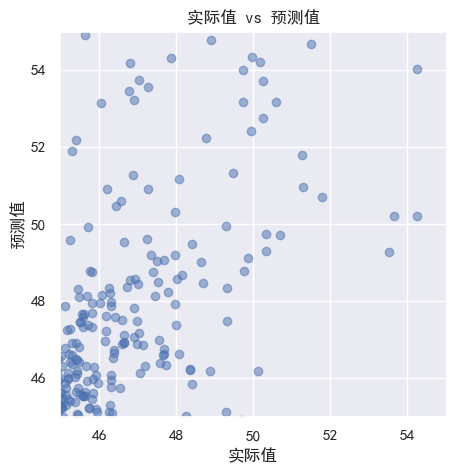

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('实际值 vs 预测值')
plt.xlabel('实际值')
plt.ylabel('预测值')

# 启用坐标网格
plt.grid(True)

# 设置 x 轴和 y 轴等比例
plt.axis('equal')

# 设置横轴取值范围为45到65
plt.xlim(45, 55)
plt.ylim(45, 55)

plt.show()


In [6]:
# 导入必要的库
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

df['Full_Text'] = df['institution'].astype(str) + ' '  + df['region'].astype(str) 


# 使用TfidfVectorizer将文本转化为向量
vectorizer = TfidfVectorizer(stop_words='english')
X_text_features = vectorizer.fit_transform(df['Full_Text'])

X_other_features = df.drop(['institution','region','Full_Text'], axis=1)

# 合并文本特征和其他数值特征
# 这里假设你的数据还有其他数值特征，需要根据实际情况调整
# 这里将文本特征和其他数值特征进行水平堆叠
  # 假设除了'score'列之外的其他列是数值特征
X = np.hstack([X_text_features.toarray(), X_other_features])


# 选择特征变量和目标变量


# 1. 找到包含 NaN 值的行的索引
nan_indices = np.isnan(X).any(axis=1)

# 2. 删除包含 NaN 值的行
X_cleaned = X[~nan_indices]

print(X_cleaned)
# 如果需要，你也可以将 X_cleaned 转换回 DataFrame
df_cleaned = pd.DataFrame(X_cleaned)

X=df_cleaned

y=df['score']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 打印结果
print(f"测试集上的RMSE值: {rmse}")


KeyError: 'institution'

#### 对线性回归模型中的系数进行分析。

In [17]:
# 获取线性回归模型的系数
coefficients = model.coef_

# 获取线性回归模型的截距
intercept = model.intercept_

# 打印系数和截距
print("系数：", coefficients)
print("截距：", intercept)


系数： [-0.00631871 -0.00732481 -0.06804994  0.0004012   0.000776   -0.00010606
 -0.00262564 -0.00249294]
截距： 66.75674946076657


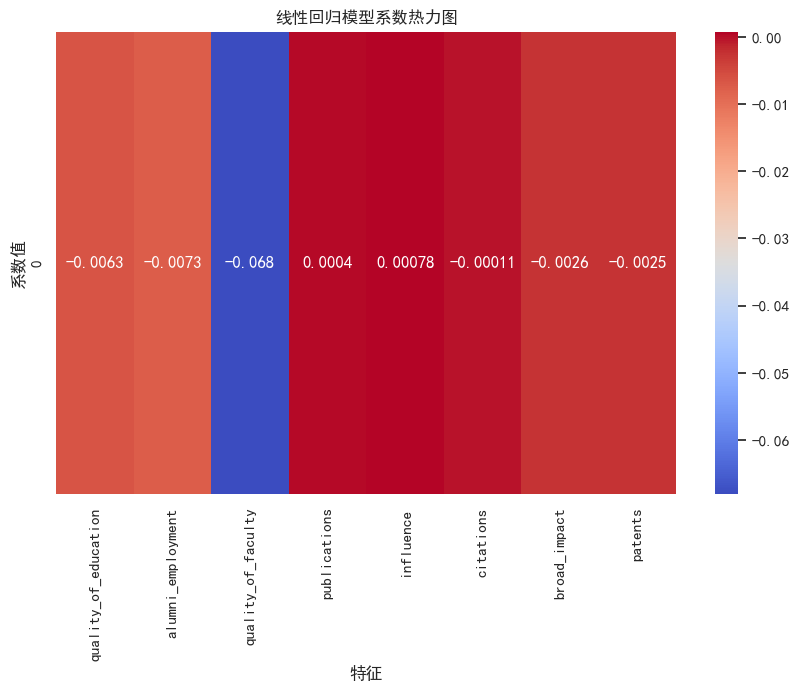

In [18]:
# 获取特征的名称
feature_names = X.columns

# 创建热力图
plt.figure(figsize=(10, 6))
sns.heatmap(coefficients.reshape(1, -1), annot=True, cmap='coolwarm', xticklabels=feature_names)
plt.title('线性回归模型系数热力图')
plt.xlabel('特征')
plt.ylabel('系数值')
plt.show()

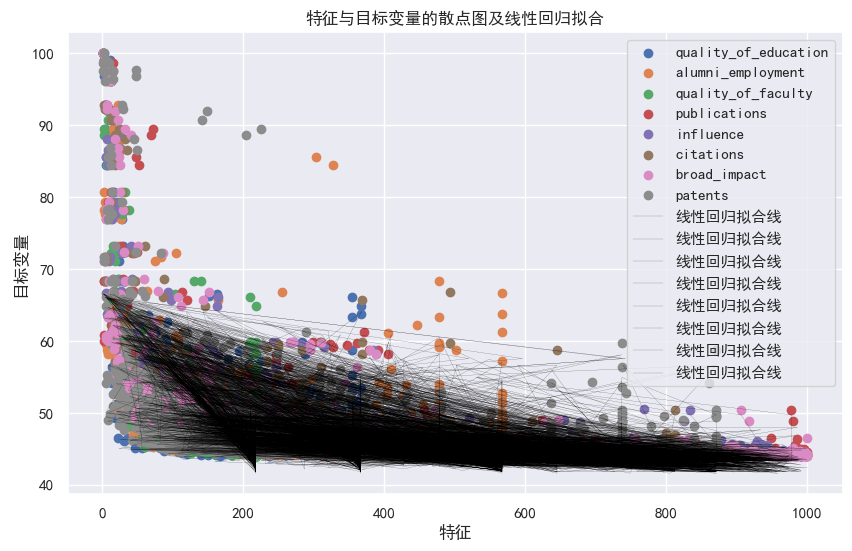

In [19]:
plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):
    plt.scatter(X.iloc[:, i], y, label=feature_names[i])

plt.plot(X_test, y_pred, color='black', linewidth=0.1, label='线性回归拟合线')
plt.title('特征与目标变量的散点图及线性回归拟合')
plt.xlabel('特征')
plt.ylabel('目标变量')
plt.legend()
plt.show()



线性回归模型在测试集上的RMSE值: 3.49542320172916
随机森林模型在测试集上的RMSE值: 0.534050392753344
岭回归模型在测试集上的RMSE值: 3.495409715458583


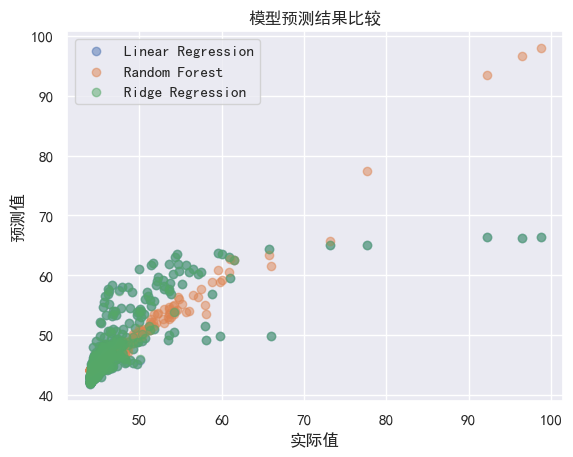

In [23]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv('D:\AI\基于回归分析的大学综合得分预测\cwurData.csv')

# 删除多列
del df['world_rank']
del df['national_rank']
del df['institution']
del df['region']

# 选择特征和目标变量
df.dropna(inplace=True)
X = df.drop(['score'], axis=1)
y = df['score']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练线性回归模型
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_lr = model_lr.predict(X_test)

# 计算线性回归模型的均方根误差（RMSE）
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# 打印线性回归模型的结果
print(f"线性回归模型在测试集上的RMSE值: {rmse_lr}")

# 训练随机森林回归模型
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_rf = model_rf.predict(X_test)

# 计算随机森林模型的均方根误差（RMSE）
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# 打印随机森林模型的结果
print(f"随机森林模型在测试集上的RMSE值: {rmse_rf}")

# 训练岭回归模型
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_ridge = model_ridge.predict(X_test)

# 计算岭回归模型的均方根误差（RMSE）
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# 打印岭回归模型的结果
print(f"岭回归模型在测试集上的RMSE值: {rmse_ridge}")

# 可视化结果
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', alpha=0.5)

plt.title('模型预测结果比较')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.legend()
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv('D:\AI\基于回归分析的大学综合得分预测\cwurData.csv')

# 删除多列
del df['world_rank']
del df['national_rank']
del df['institution']

# 处理离散特征 'region' 的独热编码
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# 选择特征和目标变量
df.dropna(inplace=True)
X = df.drop(['score'], axis=1)
y = df['score']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练线性回归模型
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_lr = model_lr.predict(X_test)

# 计算线性回归模型的均方根误差（RMSE）
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# 打印线性回归模型的结果
print(f"线性回归模型在测试集上的RMSE值: {rmse_lr}")


线性回归模型在测试集上的RMSE值: 3.516517303164773


线性回归模型在测试集上的RMSE值: 3.516517303164773
随机森林模型在测试集上的RMSE值: 0.5955962555988192
岭回归模型在测试集上的RMSE值: 3.512403352996483


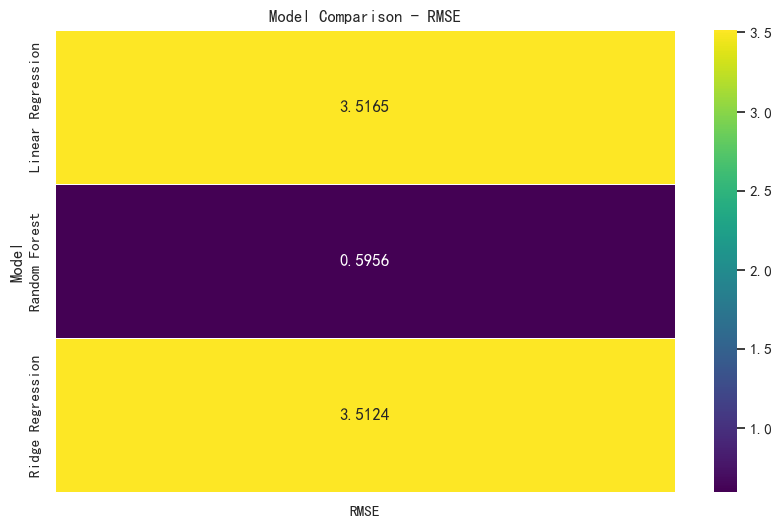

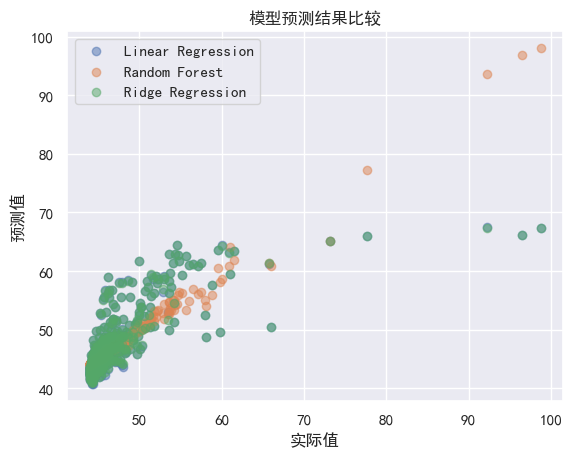

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv('D:\AI\基于回归分析的大学综合得分预测\cwurData.csv')

# 删除多列
del df['world_rank']
del df['national_rank']
del df['institution']

# 处理离散特征 'region' 的独热编码
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# 选择特征和目标变量
df.dropna(inplace=True)
X = df.drop(['score'], axis=1)
y = df['score']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练线性回归模型
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_lr = model_lr.predict(X_test)

# 计算线性回归模型的均方根误差（RMSE）
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# 打印线性回归模型的结果
print(f"线性回归模型在测试集上的RMSE值: {rmse_lr}")

# 训练随机森林回归模型
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_rf = model_rf.predict(X_test)

# 计算随机森林模型的均方根误差（RMSE）
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# 打印随机森林模型的结果
print(f"随机森林模型在测试集上的RMSE值: {rmse_rf}")

# 训练岭回归模型
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_ridge = model_ridge.predict(X_test)

# 计算岭回归模型的均方根误差（RMSE）
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# 打印岭回归模型的结果
print(f"岭回归模型在测试集上的RMSE值: {rmse_ridge}")

# 可视化模型比较结果
models = [model_lr, model_rf, model_ridge]
model_names = ['Linear Regression', 'Random Forest', 'Ridge Regression']

# 热力图比较模型
def plot_model_comparison(models, model_names, X_test, y_test):
    results = []

    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results.append({'Model': name, 'RMSE': rmse})

    results_df = pd.DataFrame(results)

    # Plotting the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(results_df.pivot_table(index='Model', values='RMSE', aggfunc='mean'),
                annot=True, cmap='viridis', fmt=".4f", linewidths=.5)
    plt.title('Model Comparison - RMSE')
    plt.show()

# 调用可视化函数
plot_model_comparison(models, model_names, X_test, y_test)

# 散点图比较预测结果
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', alpha=0.5)

plt.title('模型预测结果比较')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.legend()
plt.show()
